In [2]:
import torch
torch.__version__

'1.2.0'

In [5]:
def activation(x):
    return 1/(1+torch.exp(-x))

In [6]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 5 random normal variables
features = torch.randn((1, 5))
# True weights for our data, random normal variables again
weights = torch.randn_like(features)
# and a true bias term
bias = torch.randn((1, 1))

In [7]:
y = activation(torch.sum(features * weights) + bias)
y = activation((features * weights).sum() + bias)

In [8]:
y = activation(torch.mm(features, weights.view(5,1)) + bias)

In [9]:
### Generate some data
torch.manual_seed(7) # Set the random seed so things are predictable

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define the size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

In [10]:
h = activation(torch.mm(features, W1) + B1)
output = activation(torch.mm(h, W2) + B2)
print(output)

tensor([[0.3171]])


In [15]:
#FROM NUMPY AND BACK
import numpy as np
a = np.random.rand(4,3)
a

array([[0.78445561, 0.98470143, 0.56803857],
       [0.31907534, 0.59447376, 0.76759095],
       [0.93194366, 0.65590267, 0.18554979],
       [0.09903932, 0.06545507, 0.51648827]])

In [16]:
b = torch.from_numpy(a)
b

tensor([[0.7845, 0.9847, 0.5680],
        [0.3191, 0.5945, 0.7676],
        [0.9319, 0.6559, 0.1855],
        [0.0990, 0.0655, 0.5165]], dtype=torch.float64)

In [19]:
b.numpy()

array([[1.56891123, 1.96940286, 1.13607714],
       [0.63815069, 1.18894752, 1.53518191],
       [1.86388733, 1.31180534, 0.37109958],
       [0.19807864, 0.13091014, 1.03297654]])

In [18]:
b.mul_(2)

tensor([[1.5689, 1.9694, 1.1361],
        [0.6382, 1.1889, 1.5352],
        [1.8639, 1.3118, 0.3711],
        [0.1981, 0.1309, 1.0330]], dtype=torch.float64)

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [21]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

 98%|██████████████████████████████████████████████████████████████████▋ | 9723904/9912422 [00:11<00:00, 857503.21it/s]

Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw



0it [00:00, ?it/s]
 57%|█████████████████████████████████████████▍                               | 16384/28881 [00:00<00:00, 80545.77it/s]
32768it [00:00, 42353.52it/s]                                                                                          

Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw



0it [00:00, ?it/s]
 99%|███████████████████████████████████████████████████████████████████▌| 1638400/1648877 [00:03<00:00, 713260.86it/s]
1654784it [00:03, 518487.23it/s]                                                                                       

Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 22033.23it/s]                                                                                           

Extracting C:\Users\HP/.pytorch/MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\HP/.pytorch/MNIST_data/MNIST\raw
Processing...
Done!


9920512it [00:30, 857503.21it/s]                                                                                       

In [22]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


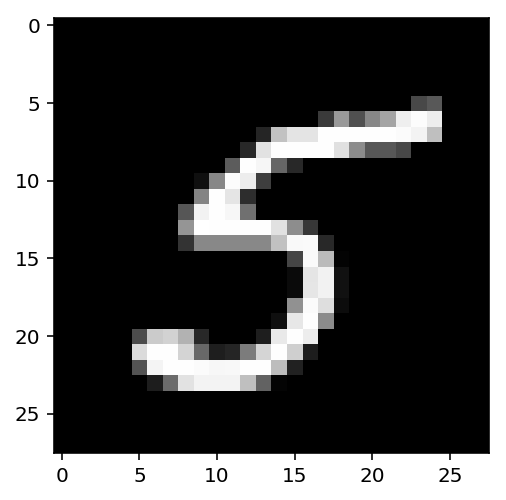

In [25]:
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');
